In [3]:
import random
import numpy as np
from scipy.stats import uniform, binom, norm
import statsmodels.stats as sm
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

## Z-test для двух выборок c биномиальным распределением

In [4]:
n = random.choice([i for i in range(490,510+1)])
m = random.choice([i for i in range(490,510+1)])

In [11]:
# Генерим вероятности успеха
p_x = uniform.rvs(size=1, loc=0, scale=1) 
p_y = uniform.rvs(size=1, loc=0, scale=1) 
print(p_x)
print(p_y)

[0.58647958]
[0.80424512]


In [12]:
x = binom.rvs(n=1, p=p_x, size=n)
y = binom.rvs(n=1, p=p_y, size=m)

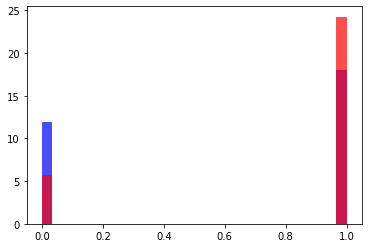

In [13]:
plt.hist(x, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(y, bins=30, density=True, color='red', alpha=0.7)
plt.show()

Посчитаем по формуле

In [14]:
p_x_est = sum(x)/n
p_y_est = sum(y)/m
P = (p_x_est*n + p_y_est*m)/(n + m)
Z = (p_x_est - p_y_est)/np.sqrt(P*(1 - P)*(1/n + 1/m))

In [15]:
p_value = (1 - norm.cdf(abs(Z)))*2
p_value

7.767120280277595e-13

Посчитаем через prop.test

In [16]:
stat, pval = proportions_ztest([sum(x), sum(y)], 
                                [len(x), len(y)]) 
print("test statistic =", stat)
print("p-value =", pval)

2-sample test for equality of proportions
test statistic = -7.165222623569842
p-value = 7.766024696619662e-13
